## Dividing by country groups

|Anglo|Confucian|Eastern European|Germanic|Latin American|
|:--|:--|:--|:--|:--|
|UK (GB)<br>New Zealand (NZ)|China (CN)<br>Korea (KR)<br>Taiwan (TW)|Bulgaria (BG)<br>Cyprus (CY)<br>Greece (GR)<br>Croatia (HR)<br>Hungary (HU)<br>Poland (PL)<br>Russia (RU)|Austria (AT)<br>Belgium (BE)<br>Switzerland (CH)<br>Germany (DE)|Mexico (MX)|
|**Latin European**|**Middle Eastern**|**Nordic**|**Southeast Asia**|**NA**|
|Spain (ES)<br>France (FR)<br>Italy (IT)<br>Portugal (PT)|Egypt (EG)<br>Turkey (TR)|Finland (FI)<br>Lithuania (LT)|India (IN)<br>Malaysia (MY)<br>Pakistan (PK)<br>Thailand (TH)|**USA (US)**<br>**CERN**|

In [1]:
dat <- read.csv(file = "../quant_analysis/final_dataset.csv", 
                header = TRUE)

library(dplyr, warn.conflicts = FALSE)
library(gridExtra, warn.conflicts = FALSE)
library(ggplot2, warn.conflicts = FALSE)
library(plotly, warn.conflicts = FALSE)

# for long form conversion of data frame
library(reshape2)

In [2]:
### FILTERING COUNTRY GROUPS ###

# "Anglo": UK (GB), New Zealand (NZ)

dat.country.anglo <- filter(dat, 
                            inst_country=="GB" 
                            | inst_country=="NZ")

# "Confucian": China (CN), Korea (KR), Taiwan (TW)

dat.country.confucian <- filter(dat, 
                                inst_country=="CN" 
                                | inst_country=="KR"
                                | inst_country=="TW")

# "Eastern European": Bulgaria (BG), Cyprus (CY), Greece (GR),
#                     Croatia (HR), Hungary (HU), Poland (PL), 
#                     Russia (RU)

dat.country.easternEuropean <- filter(dat, 
                                      inst_country=="BG" 
                                      | inst_country=="CY"
                                      | inst_country=="GR" 
                                      | inst_country=="HR" 
                                      | inst_country=="HU" 
                                      | inst_country=="PL" 
                                      | inst_country=="RU")

# "Germanic": Austria (AT), Belgium (BE), Switzerland (CH), 
#             Germany (DE)


dat.country.germanic <- filter(dat, 
                               inst_country=="AT" 
                               | inst_country=="BE" 
                               | inst_country=="CH" 
                               | inst_country=="DE")

# "Latin American": Mexico (MX)

dat.country.latinAmerican <- filter(dat, 
                                    inst_country=="MX")

# "Latin European": Spain (ES), France (FR), Italy (IT), Portugal (PT)

dat.country.latinEuropean <- filter(dat, 
                                    inst_country=="ES" 
                                    | inst_country=="FR" 
                                    | inst_country=="IT" 
                                    | inst_country=="PT")

# "Middle Eastern": Egypt (EG), Turkey (TR)

dat.country.middleEastern <- filter(dat, 
                                    inst_country=="EG" 
                                    | inst_country=="TR")

# "Nordic": Finland (FI), Lithuania (LT)

dat.country.nordic <- filter(dat, 
                             inst_country=="FI" 
                             | inst_country=="LT")

# "Southeast Asia": India (IN), Malaysia (MY), Pakistan (PK), 
#                   Thailand (TH)

dat.country.southeastAsia <- filter(dat, 
                                    inst_country=="IN" 
                                    | inst_country=="MY" 
                                    | inst_country=="PK" 
                                    | inst_country=="TH")

# USA (US)

dat.country.USA <- filter(dat, 
                          inst_country=="US")

# CERN (CERN)

dat.country.CERN <- filter(dat, 
                           inst_country=="CERN")

In [3]:
countryGroup <- c("anglo", "confucian", "easternEuropean", 
                  "germanic", "latinAmerican", "latinEuropean", 
                  "middleEastern", "nordic", "southeastAsia", 
                  "USA", "CERN")

groupName <- c("Anglo", "Confucian", "Eastern European", 
               "Germanic", "Latin American", "Latin European", 
               "Middle Eastern", "Nordic", "Southeast Asia", 
               "USA", "CERN")

allGroups <- data.frame(countryGroup, groupName)

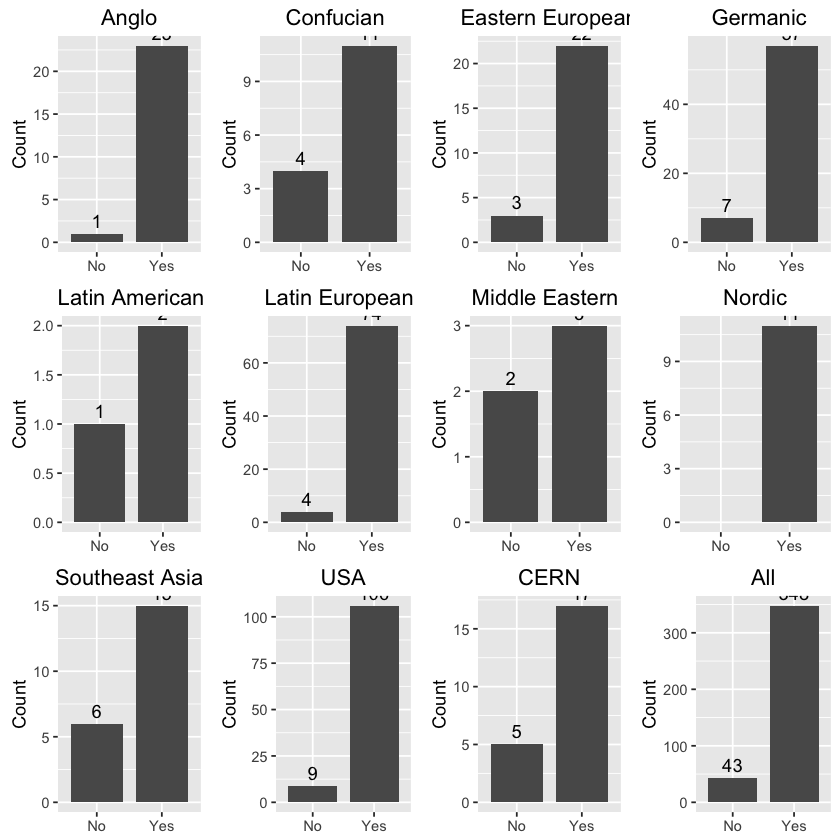

In [4]:
i <- 1
plot_list <- list()
for (val in allGroups[,1]) {
    name <- allGroups[i,2]
    grp <- paste("dat.country.", val, sep="")
    grp <- get(grp)
    plot_list[[i]] <- ggplot(grp, aes(x = previous_participation)) + 
                      geom_bar(width=0.8) + 
                      geom_text(stat="count", aes(label = ..count.., 
                                                    y=..count..), vjust=-0.5) + 
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(drop=FALSE) + 
                      labs(title=name)
    i <- i+1
}

plot_list[[i]] <- ggplot(dat, aes(x = previous_participation)) + 
                      geom_bar(width=0.8) + 
                      geom_text(stat="count", aes(label = ..count.., 
                                                    y=..count..), vjust=-0.5) + 
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(drop=FALSE) + 
                      labs(title="All")

do.call(grid.arrange, c(plot_list, ncol=4))

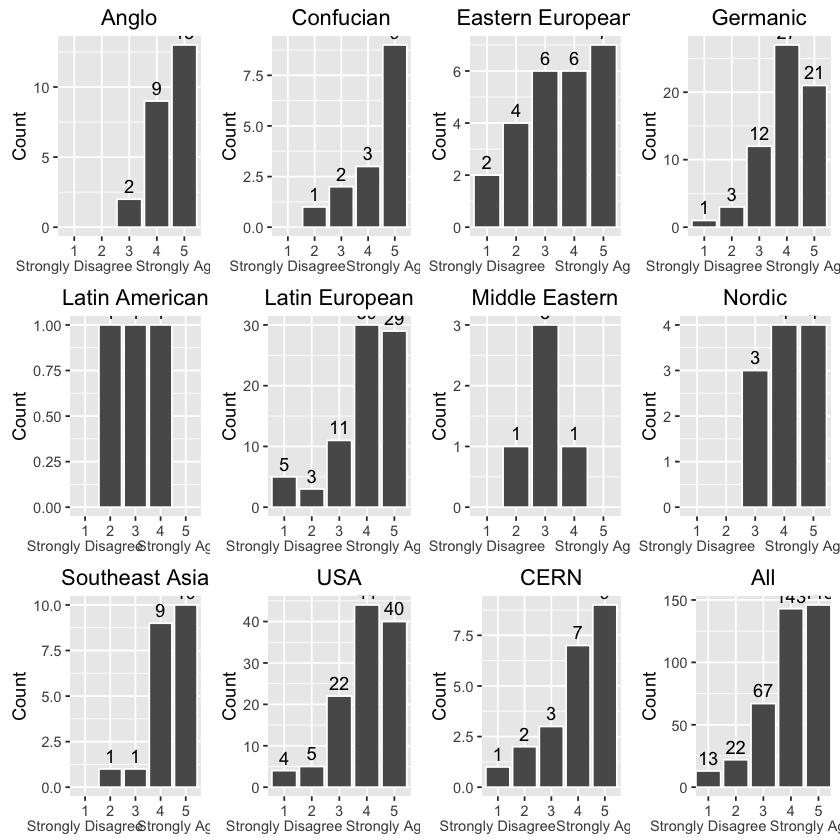

In [5]:
i <- 1
plot_list <- list()
for (val in allGroups[,1]) {
    name <- allGroups[i,2]
    grp <- paste("dat.country.", val, sep="")
    grp <- get(grp)
    fltr <- melt(as.matrix(grp[c('imp_because_taxes')]))
    fltr$value <- factor(fltr$value, 
                         levels=c(1, 2, 3, 4, 5))
    plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title=name)
    i <- i+1
}

fltr <- melt(as.matrix(dat[c('imp_because_taxes')]))
plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title="All")

do.call(grid.arrange, c(plot_list, ncol=4))

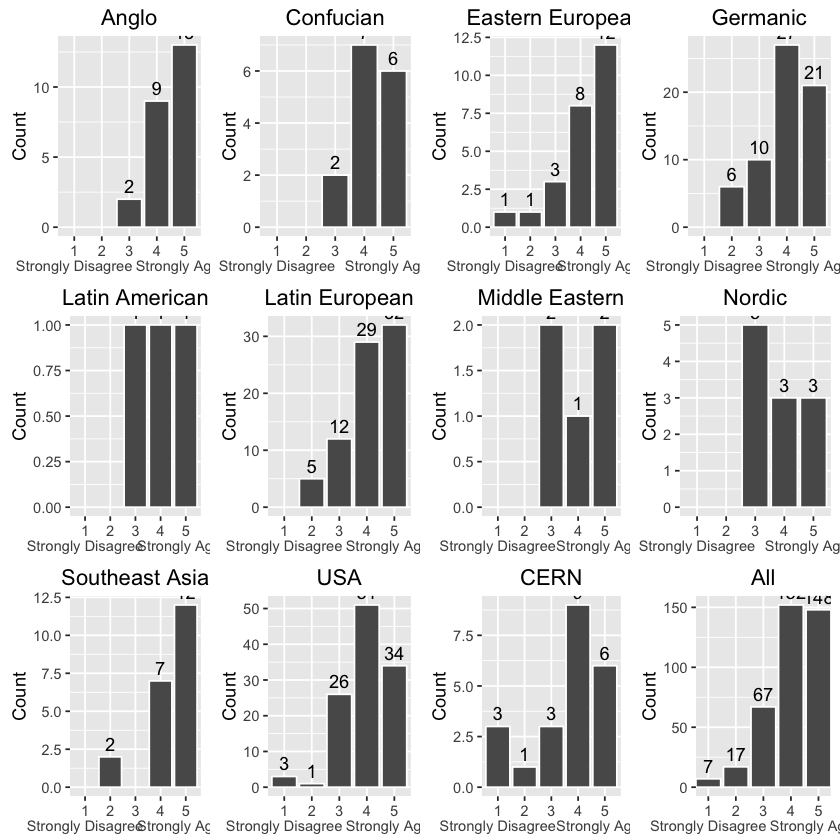

In [6]:
i <- 1
plot_list <- list()
for (val in allGroups[,1]) {
    name <- allGroups[i,2]
    grp <- paste("dat.country.", val, sep="")
    grp <- get(grp)
    fltr <- melt(as.matrix(grp[c('funding_should_support')]))
    fltr$value <- factor(fltr$value, 
                         levels=c(1, 2, 3, 4, 5))
    plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title=name)
    i <- i+1
}

fltr <- melt(as.matrix(dat[c('funding_should_support')]))
plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title="All")

do.call(grid.arrange, c(plot_list, ncol=4))

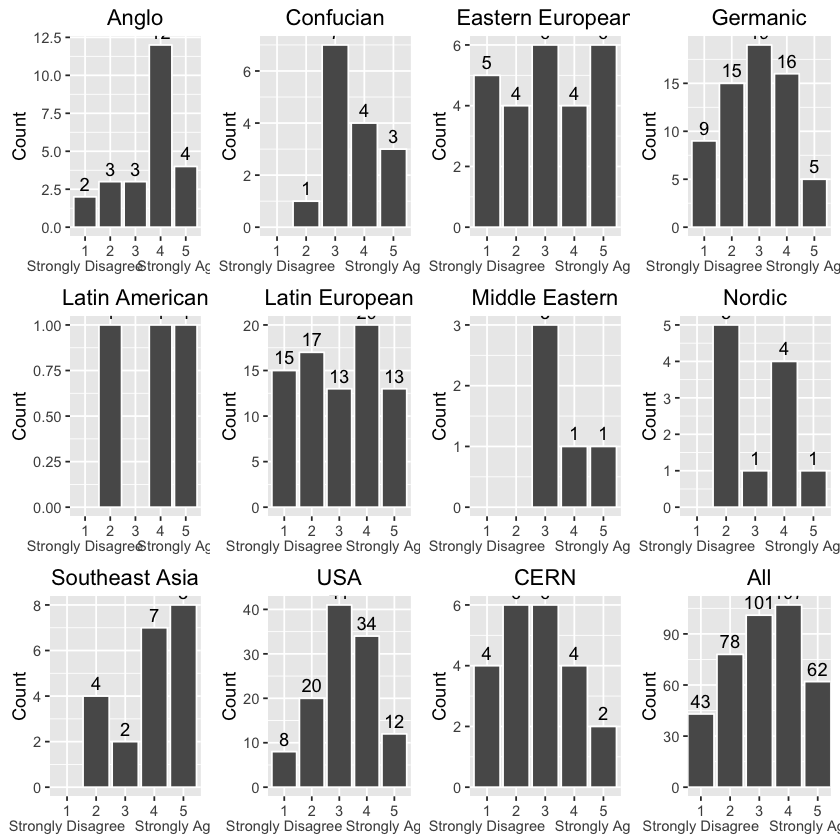

In [7]:
i <- 1
plot_list <- list()
for (val in allGroups[,1]) {
    name <- allGroups[i,2]
    grp <- paste("dat.country.", val, sep="")
    grp <- get(grp)
    fltr <- melt(as.matrix(grp[c('grants_wider_society')]))
    fltr$value <- factor(fltr$value, 
                         levels=c(1, 2, 3, 4, 5))
    plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title=name)
    i <- i+1
}

fltr <- melt(as.matrix(dat[c('grants_wider_society')]))
plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title="All")

do.call(grid.arrange, c(plot_list, ncol=4))

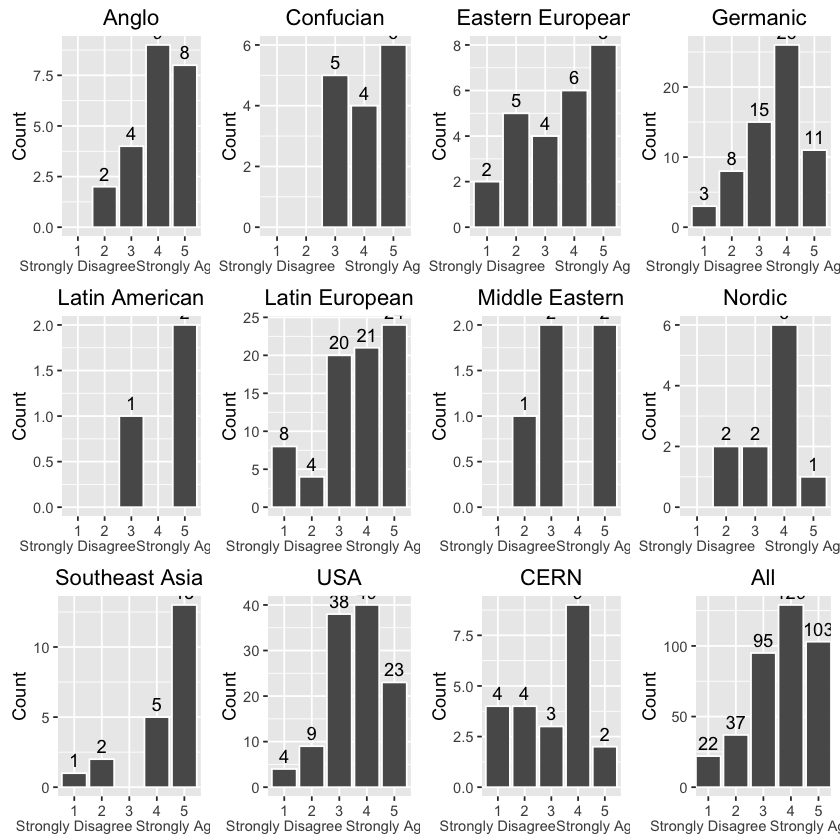

In [8]:
i <- 1
plot_list <- list()
for (val in allGroups[,1]) {
    name <- allGroups[i,2]
    grp <- paste("dat.country.", val, sep="")
    grp <- get(grp)
    fltr <- melt(as.matrix(grp[c('makes_better_scientist')]))
    fltr$value <- factor(fltr$value, 
                         levels=c(1, 2, 3, 4, 5))
    plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title=name)
    i <- i+1
}

fltr <- melt(as.matrix(dat[c('makes_better_scientist')]))
plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title="All")

do.call(grid.arrange, c(plot_list, ncol=4))

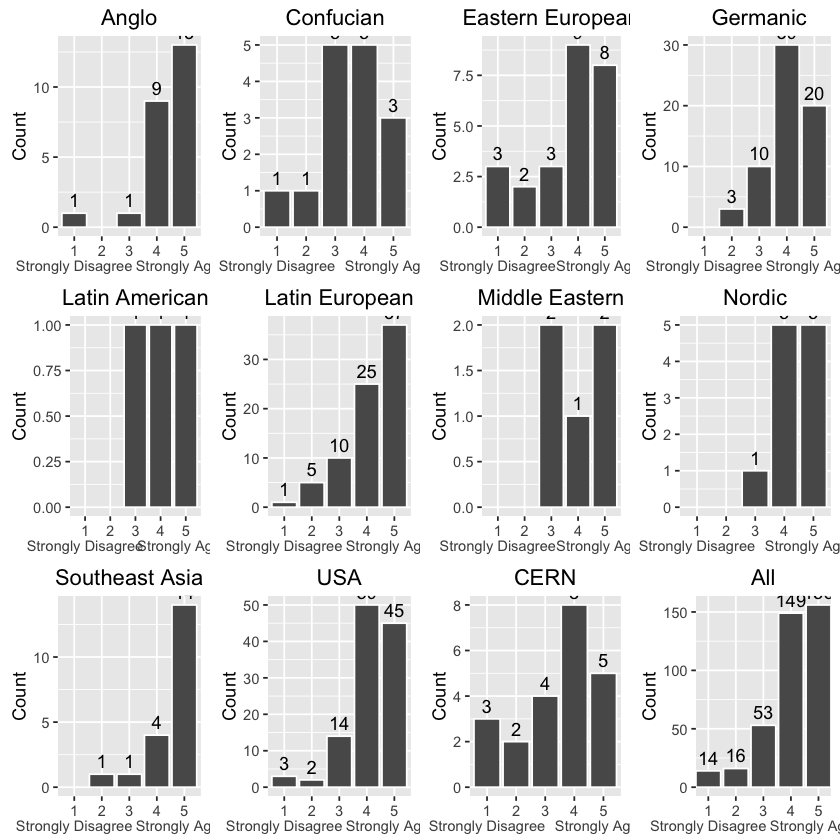

In [9]:
i <- 1
plot_list <- list()
for (val in allGroups[,1]) {
    name <- allGroups[i,2]
    grp <- paste("dat.country.", val, sep="")
    grp <- get(grp)
    fltr <- melt(as.matrix(grp[c('feeling_enjoyment')]))
    fltr$value <- factor(fltr$value, 
                         levels=c(1, 2, 3, 4, 5))
    plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title=name)
    i <- i+1
}

fltr <- melt(as.matrix(dat[c('feeling_enjoyment')]))
plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title="All")

do.call(grid.arrange, c(plot_list, ncol=4))

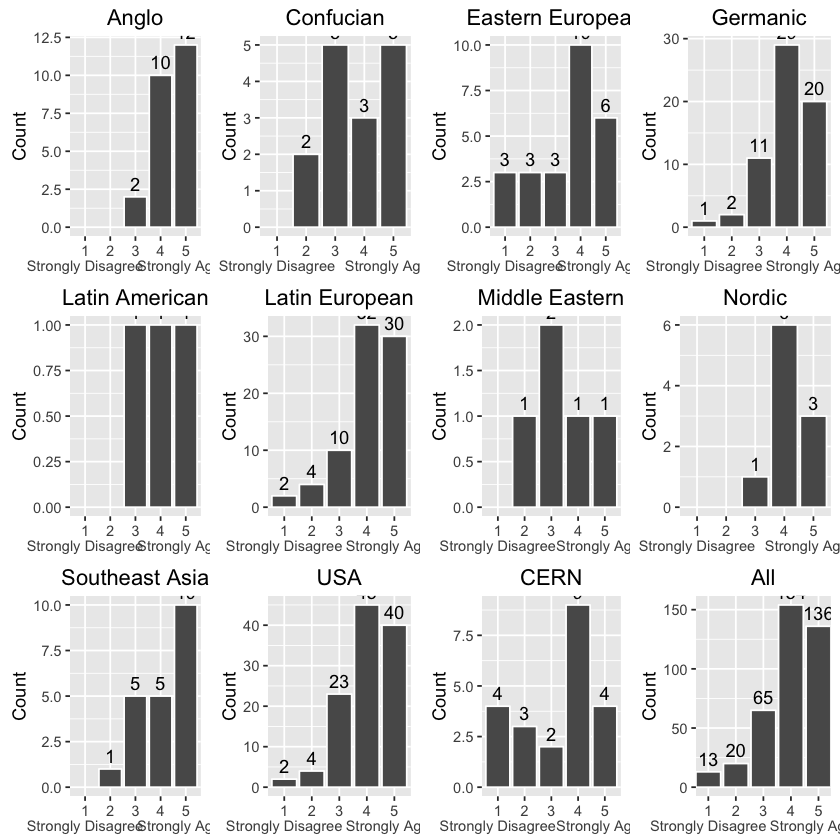

In [10]:
i <- 1
plot_list <- list()
for (val in allGroups[,1]) {
    name <- allGroups[i,2]
    grp <- paste("dat.country.", val, sep="")
    grp <- get(grp)
    fltr <- melt(as.matrix(grp[c('job_satisfaction')]))
    fltr$value <- factor(fltr$value, 
                         levels=c(1, 2, 3, 4, 5))
    plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title=name)
    i <- i+1
}

fltr <- melt(as.matrix(dat[c('job_satisfaction')]))
plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title="All")

do.call(grid.arrange, c(plot_list, ncol=4))

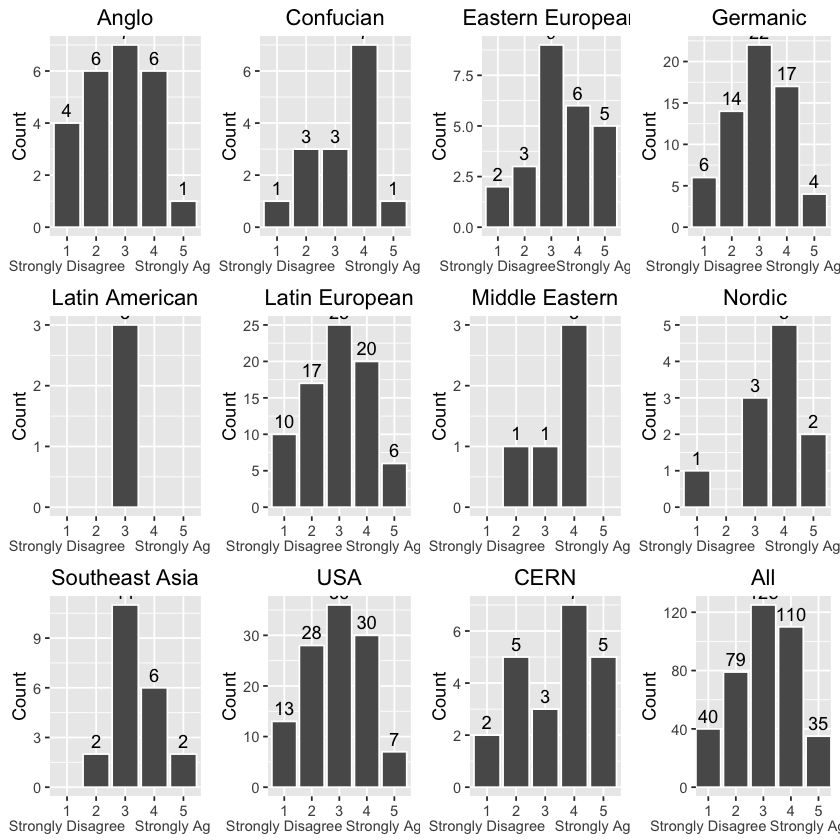

In [11]:
i <- 1
plot_list <- list()
for (val in allGroups[,1]) {
    name <- allGroups[i,2]
    grp <- paste("dat.country.", val, sep="")
    grp <- get(grp)
    fltr <- melt(as.matrix(grp[c('attracts_funding')]))
    fltr$value <- factor(fltr$value, 
                         levels=c(1, 2, 3, 4, 5))
    plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title=name)
    i <- i+1
}

fltr <- melt(as.matrix(dat[c('attracts_funding')]))
plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title="All")

do.call(grid.arrange, c(plot_list, ncol=4))

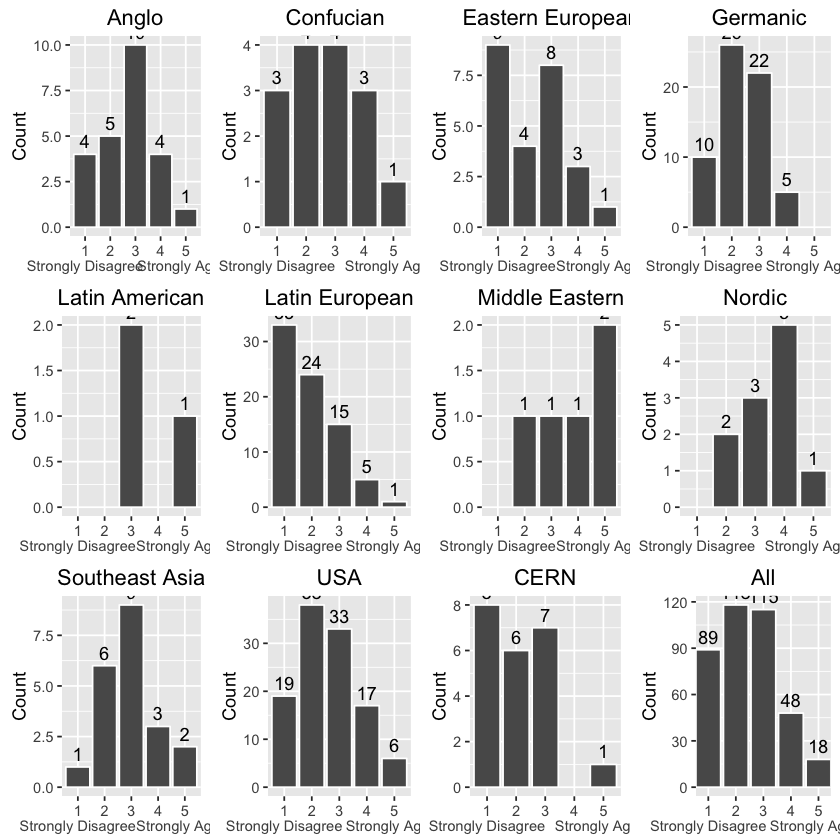

In [12]:
i <- 1
plot_list <- list()
for (val in allGroups[,1]) {
    name <- allGroups[i,2]
    grp <- paste("dat.country.", val, sep="")
    grp <- get(grp)
    fltr <- melt(as.matrix(grp[c('advances_career')]))
    fltr$value <- factor(fltr$value, 
                         levels=c(1, 2, 3, 4, 5))
    plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title=name)
    i <- i+1
}

fltr <- melt(as.matrix(dat[c('advances_career')]))
plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title="All")

do.call(grid.arrange, c(plot_list, ncol=4))

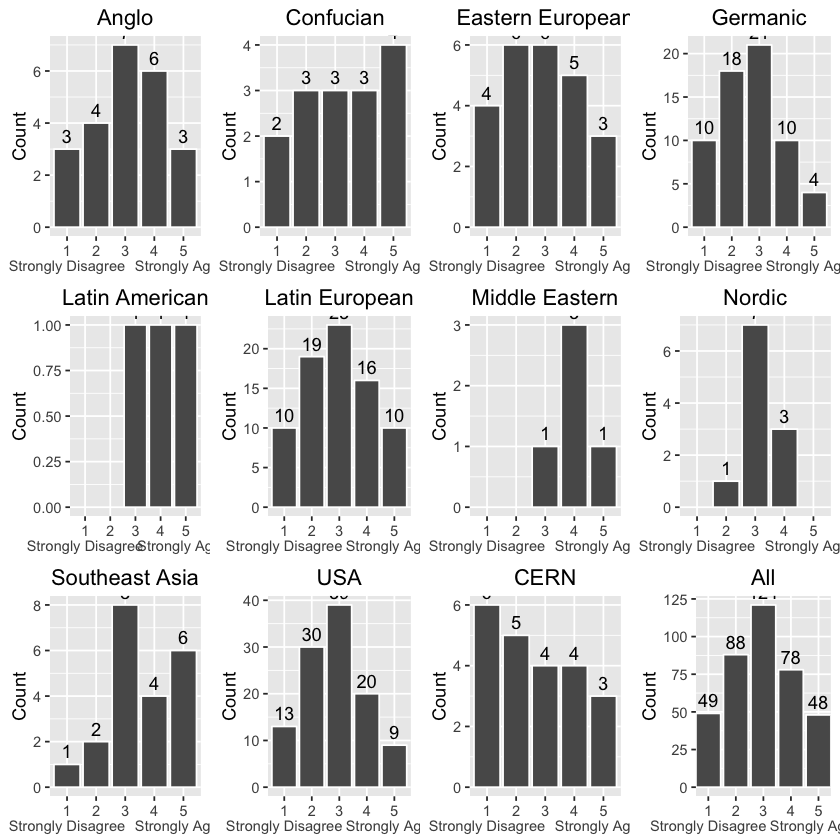

In [13]:
i <- 1
plot_list <- list()
for (val in allGroups[,1]) {
    name <- allGroups[i,2]
    grp <- paste("dat.country.", val, sep="")
    grp <- get(grp)
    fltr <- melt(as.matrix(grp[c('collaboration_opportunities')]))
    fltr$value <- factor(fltr$value, 
                         levels=c(1, 2, 3, 4, 5))
    plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title=name)
    i <- i+1
}

fltr <- melt(as.matrix(dat[c('collaboration_opportunities')]))
plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title="All")

do.call(grid.arrange, c(plot_list, ncol=4))

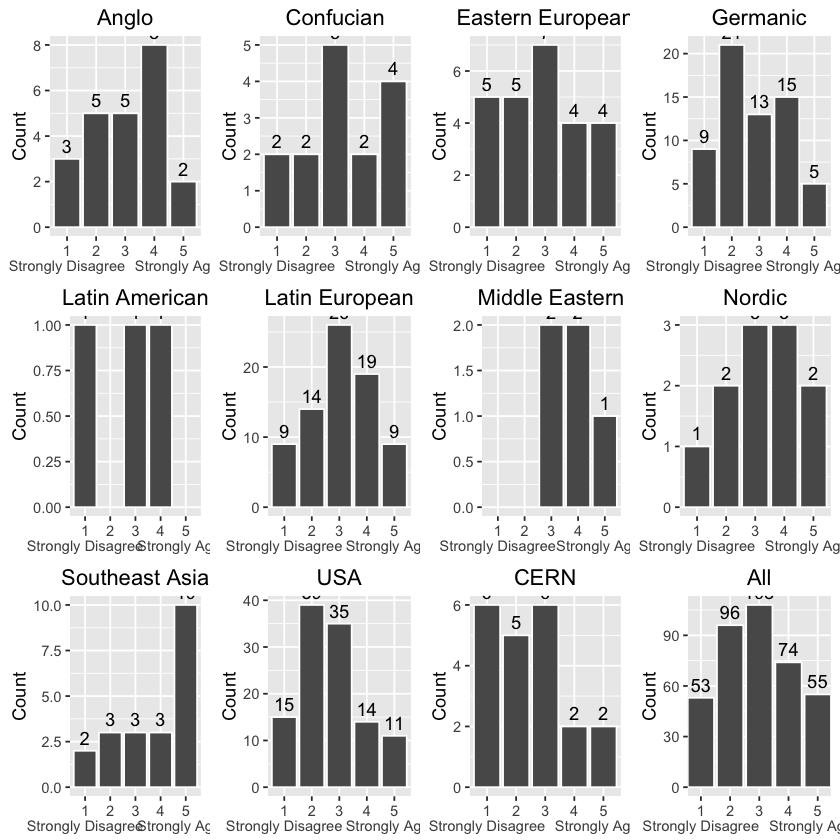

In [14]:
i <- 1
plot_list <- list()
for (val in allGroups[,1]) {
    name <- allGroups[i,2]
    grp <- paste("dat.country.", val, sep="")
    grp <- get(grp)
    fltr <- melt(as.matrix(grp[c('research_new_ways')]))
    fltr$value <- factor(fltr$value, 
                         levels=c(1, 2, 3, 4, 5))
    plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title=name)
    i <- i+1
}

fltr <- melt(as.matrix(dat[c('research_new_ways')]))
plot_list[[i]] <- ggplot(na.omit(fltr), aes(x = value)) + 
                      geom_bar(stat="count", colour="white") + 
                      geom_text(stat="count", aes(label = ..count..,
                                y=..count..), vjust=-0.5) +
                      ylab("Count") + 
                      theme(axis.title.x=element_blank()) + 
                      scale_x_discrete(name = NULL, 
                                       limits = c(1:5), 
                                       drop = FALSE, 
                                       labels = c("1" = "1\nStrongly Disagree", 
                                                  "2" = "2", "3" = "3", "4" = "4", 
                                                  "5" = "5\nStrongly Agree")) +
                      labs(title="All")

do.call(grid.arrange, c(plot_list, ncol=4))